# 机器学习 PROJECT1

### 蓝浩宁 518021910270

## 目录
### 1 项目概述
#### 1.1 目标
#### 1.2 数据集
### 2 数据读取与分析
#### 2.1 数据读取
#### 2.2 数据分析
### 3 数据预处理
#### 3.1 标签二分
#### 3.2 数据标准化
#### 3.3 数据拆分
### 4 模型实现
#### 4.1 Naïve Bayesian
#### 4.2 Logistic Regression
#### 4.3 SVM
### 5 精度对比
#### 5.1 Naïve Bayesian
#### 5.2 Logistic Regression
#### 5.3 SVM
#### 5.4 精度对比
### 6 时间对比
#### 6.1 Naïve Bayesian
#### 6.2 Logistic Regression
#### 6.3 SVM
#### 6.4 时间对比
### 7 总结
#### 7.1 Naïve Bayesian
#### 7.2 Logistic Regression
#### 7.3 SVM

## 1 项目概述
### 1.1 目标
- 实现两种分类算法
   - Naïve Bayesian
   - Logistic Regression
- 使用 sklearn Python包来实现支持向量机(SVM)
- 比较几种分类方法的性能
### 1.2 数据集
Mobile Price Classification

https://www.kaggle.com/iabhishekofficial/mobile-priceclassification?select=train.csv

In [95]:
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
import seaborn as sns

## 2.2 数据读取与分析

### 2.1 数据读取
利用pandas中的read_csv

In [96]:
raw_data = pd.read_csv("./archive/train.csv")

### 2.2 数据分析


In [97]:
raw_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

数据集的属性:

- id: 记录条目序列号
- battery_power: 电池一次可储存的总能量, 单位为mAh
- blue: 是否有蓝牙
- clock_speed：微处理器执行指令的速度
- dual_sim: 是否支持双卡
- fc: 前置摄像头, 百万像素
- four_g: 是否有4G
- int_memory: 内部内存（千兆字节）
- m_dep: 移动深度（厘米）
- mobile_wt: 移动电话的重量
- n_cores: 处理器的核心数
- PC: 主摄像头, 百万像素
- px_height: 像素分辨率高度
- px_width: 像素分辨率宽度
- ram: 随机存取内存（兆字节）
- sc_h: 移动电话的屏幕高度（厘米）
- sc_w: 移动电话的屏幕宽度（厘米）
- talk_time: 当你在使用时，一次电池充电的最长时间
- three_g: 是否有3G
- touch_screen: 是否有触摸屏
- wifi: 是否有wifi
- price_range: 这是目标变量，值为0（低成本）、1（中等成本）、2（高成本）和3（非常高成本）

In [98]:
raw_data.shape

(2000, 21)

共有2000行的数据，每行数据有21个属性.

In [99]:
raw_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

数据类型有int64和float64

In [100]:
pd.isnull(raw_data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

我们的数据集中没有任何空值,这将简化预处理步骤。

In [101]:
raw_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


如上所述，我们的数据有标签，我们将应用监督学习算法。

我们将目标列定义为 "y"，其余数据作为输入的 "x"。

In [102]:
def data_to_x_y(data_in):
    data_y = data_in['price_range']
    data_x = data_in.drop('price_range', axis = 1)
    return data_x, data_y

raw_x, raw_y = data_to_x_y(raw_data)

In [103]:
raw_y.unique()

array([1, 2, 3, 0], dtype=int64)

共有4种标签类型

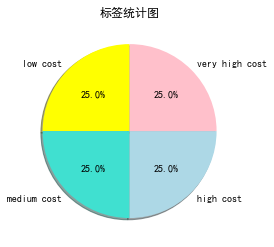

In [104]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = raw_data['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('标签统计图')
plt.show()

这四种标签比例非常均衡

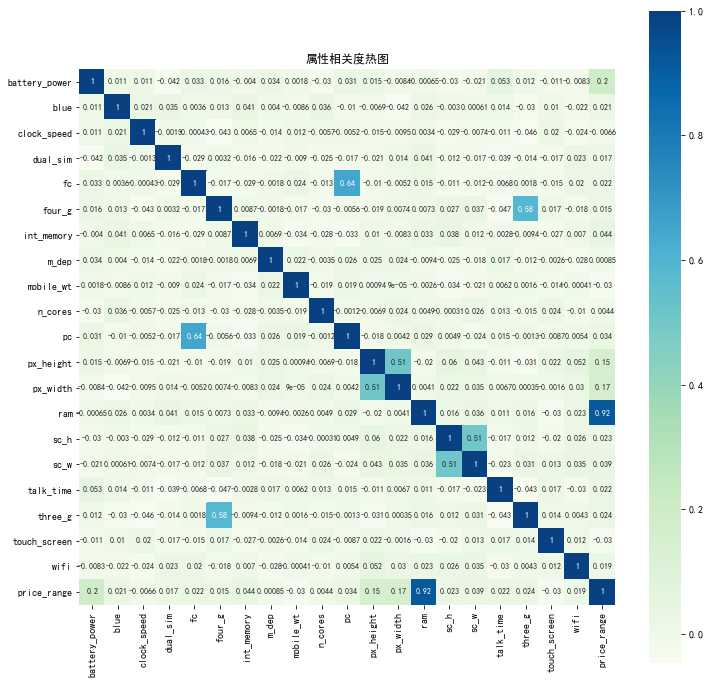

In [105]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(raw_data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('属性相关度热图')
plt.show ()

从热图中我们可以看出：

- 影响最大的变量是内存

- 大多数变量与价格区间的关联性很低

- 在我们的数据集中没有高度相关的输入，所以不存在多线性问题。

## 3 数据预处理
接下来我们将使用data

In [106]:
data = raw_data.copy(deep=True)

### 3.1 标签二分
 将标签转换成两类: low (0, 1) 和 high (2, 3)

In [107]:
def price_range_remap(data_in): 
    data_out = data_in.copy()
    data_out['price_range']=pd.cut(data_out['price_range'], 2, labels=False)
    return data_out
data = price_range_remap(data)

x,y=data_to_x_y(data)
y.unique()

array([0, 1], dtype=int64)

### 3.3 数据标准化
将所有数据映射到\[0,1\]

In [108]:
def normalize(data_in):
    # 采用min-max标准化
    scaler = lambda x: (x - np.min(x)) / (np.max(x)-np.min(x))
    for index in data.columns:
        data[index] = data[[index]].apply(scaler)
    return data

data = normalize(data)
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,...,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000,0.500000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,...,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076,0.500125
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.000000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,...,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,0.500000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,...,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.2 拆分数据集
按8：1：1的比例将数据集拆分成train.csv,test.csv,valid.csv

In [109]:
x,y=data_to_x_y(data)

def split_data(x,y):
    x_train, x_test_valid, y_train, y_test_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)
    x_test, x_valid, y_test, y_valid = train_test_split(x_test_valid, y_test_valid, test_size = 0.5, random_state = 101, stratify = y_test_valid)
    return x_train, x_test, x_valid, y_train, y_test, y_valid

x_train,x_test,x_valid,y_train,y_test,y_valid = split_data(x,y)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(1600, 20)
(200, 20)
(200, 20)


train中有1600条数据，test和valid各有200条数据，符合要求

In [110]:
# write to csv
def write_csv(x,y,filename):
    df = x.copy()
    df['price_range']=y
    df.to_csv('{}'.format(filename), encoding='utf-8')

write_csv(x_train,y_train,'./data/train.csv')
write_csv(x_valid,y_valid,'./data/valid.csv')
write_csv(x_test,y_test,'./data/test.csv')

写入至data文件夹中

## 4 模型实现

### 4.1 Naïve Bayesian

In [111]:
class NaiveBayesian:
    
    def __init__(self):
        self.model = {}

    def fit(self, x_train, y_train = pd.Series()):
        if not y_train.empty:
            x_train = pd.concat([x_train, y_train], axis=1)
        self.model = self.buildNaiveBayesian(x_train) 
        
    def buildNaiveBayesian(self, x_train):

        #计算P(Ci)
        y_train = x_train.iloc[:,-1]
        y_trainCounts = y_train.value_counts()
        y_trainCounts = y_trainCounts.apply(lambda x : (x + 1) / (y_train.size + y_trainCounts.size)) #拉普拉斯平滑

        retModel = {}
        for name, value in y_trainCounts.items():
            retModel[name] = {'PCi': value, 'PxiCi':{}}
 
        #统计变量类型
        propNamesAll = x_train.columns[:-1]
        allPropByFeature = {}
        for name in propNamesAll:
            allPropByFeature[name] = list(x_train[name].value_counts().index)

        for name, group in x_train.groupby(x_train.columns[-1]):
            for feature in propNamesAll:
                eachClassPFeature = {}
                propDatas = group[feature]
                propClassSummary = propDatas.value_counts()
                # 计算后验概率
                for propName in allPropByFeature[feature]:
                    if not propClassSummary.get(propName):
                        propClassSummary[propName] = 0
                Ni = len(allPropByFeature[feature])
                propClassSummary = propClassSummary.apply(lambda x : (x + 1) / (propDatas.size + Ni)) #拉普拉斯平滑

                for nameFeatureProp, valP in propClassSummary.items():
                    eachClassPFeature[nameFeatureProp] = valP
                retModel[name]['PxiCi'][feature] = eachClassPFeature
        return retModel

    def predictBySeries(self, data):
        curMaxRate = None
        curClassSelect = None
        for name, infoModel in self.model.items():
            rate = 0
            rate += np.log(infoModel['PCi'])
            PFeature = infoModel['PxiCi']
            # 计算概率
            for feature, val in data.items():
                propsRate = PFeature.get(feature)
                if not propsRate:
                    continue
                rate += np.log(propsRate.get(val, 0))
            # 取最高的rate
            if curMaxRate == None or rate > curMaxRate:
                curMaxRate = rate
                curClassSelect = name
        return curClassSelect

    def predict(self, data):
        if isinstance(data, pd.Series):
            return self.predictBySeries(data)
        return data.apply(lambda d: self.predictBySeries(d), axis=1)

### 4.2 Logistic Regression


In [112]:
class LogisticRegression:

    def __init__(self):
        self.theta = []
        self.total_cycles = 0
        self.cycles = []
        self.accuracy_train = []
        self.accuracy_valid = []
        self.error = []
        self.alpha = 0.001
        self.cycles = 2

    # sigmoid函数
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))

    def fit(self, x_train, y_train,x_valid,y_valid):
        self.theta = np.ones((len(x_train.columns), 1))
        self.total_cycles = 0
        self.accuracy_train = []
        self.accuracy_valid = []
        self.cycles_x = []
        self.error = []
        self.buildLogisticRegression(x_train,y_train,x_valid,y_valid)
    
    def buildLogisticRegression(self, x_train,y_train,x_valid,y_valid): 
        alpha = self.alpha

        count = 0
        max_acc = 0
        cur_max_acc = 0

        while True:

            y_train_predict = self.predict(x_train)
            acc_train = metrics.accuracy_score(y_train, y_train_predict)
            self.accuracy_train.append(acc_train)

            y_valid_predict = self.predict(x_valid)
            acc_valid = metrics.accuracy_score(y_valid, y_valid_predict)
            self.accuracy_valid.append(acc_valid)

            self.cycles_x.append(self.total_cycles)
            self.theta = self.grad_ascent(x_train, y_train, self.theta, alpha,self.cycles)
            self.total_cycles += self.cycles
            
            if acc_train > cur_max_acc:
                cur_max_acc = acc_train
                count = 0
                if cur_max_acc > max_acc:
                    max_acc = cur_max_acc
            else:
                count += 1
                if count > 5:
                    alpha /= 2
                    if alpha < 0.000001:
                        break
                    
        print("训练轮数: %d"%self.total_cycles)
        
    def grad_ascent(self, x_train, y_train, theta, alpha=0.001, cycles=1):
        data_matrix = np.mat(x_train.values)
        label_mat = np.mat(y_train).transpose()
        for i in range(cycles):
            h = self.sigmoid(data_matrix * theta)
            error = (label_mat - h)
            self.error.append(np.linalg.norm(error))
            theta = theta + alpha * data_matrix.transpose() * error
        return theta

    def show(self):
        plt.plot(self.cycles_x, [acc * 100 for acc in self.accuracy_train],
             label="x_train")
        plt.plot(self.cycles_x, [acc * 100 for acc in self.accuracy_valid],
             label="x_valid")
        plt.plot(range(self.total_cycles), self.error,
             label="error")
        plt.legend(loc='best')
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.xlabel("循环次数")
        plt.ylabel("准确度:%")
        plt.title("逻辑回归模型")
        plt.show()
    
    def predict(self,x_test):
        theta = self.theta
        result = []
        data_mat = np.mat(x_test.values)
        h_theta = data_mat * theta  #通过回归函数计算概率, size*1
        for i in range(len(h_theta)):
            result.append(int(h_theta[i, 0] >= 0))
        return result


### 4.3 SVM

In [113]:
class SVM:

    def __init__(self):
        self.model = svm.SVC(probability=True,kernel='linear')

    def fit(self, x_train, y_train = pd.Series()):
        self.model.fit(x_train, y_train)
    
    def predict(self, x_test):
        return self.model.predict(x_test)



## 5 精度对比

In [114]:
def predict_acc(y_predict,y_true):
    result = pd.DataFrame({'预测值':y_predict, '实际值':y_true})
    print(result)
    acc = result[result['预测值'] == result['实际值']].shape[0] * 100.0 / result.shape[0]
    print('准确率:%f%%'%acc)
    return acc

### 5.1 Naïve Bayesian

In [115]:
nb = NaiveBayesian()
def discretize(data_in):
    data_out = data_in.copy(deep=True)
    for index in data_out.columns:
        if len(data_out[index].value_counts())>10:
            data_out[index]=pd.cut(data_out[index], 10, labels=False)
    return data_out

NB_data = discretize(data)
NB_x,NB_y = data_to_x_y(NB_data)
NB_x_train,NB_x_test,NB_x_valid,NB_y_train,NB_y_test,NB_y_valid = split_data(NB_x,NB_y)

nb.fit(NB_x_train,NB_y_train)
NB_y_predict = nb.predict(NB_x_test)
nb_acc = predict_acc(NB_y_predict,NB_y_test)

      预测值  实际值
1010  1.0  1.0
893   0.0  0.0
688   0.0  0.0
532   1.0  1.0
1626  0.0  0.0
...   ...  ...
1421  1.0  1.0
670   1.0  1.0
713   0.0  0.0
890   0.0  0.0
1334  0.0  0.0

[200 rows x 2 columns]
准确率:93.000000%


### 5.2 SVM

In [116]:
svm = SVM()
svm.fit(x_train,y_train)
svm_y_predict = svm.predict(x_test)

svm_acc=predict_acc(svm_y_predict,y_test)

      预测值  实际值
1010  1.0  1.0
893   0.0  0.0
688   0.0  0.0
532   1.0  1.0
1626  0.0  0.0
...   ...  ...
1421  1.0  1.0
670   1.0  1.0
713   0.0  0.0
890   0.0  0.0
1334  0.0  0.0

[200 rows x 2 columns]
准确率:98.500000%


### 5.3 Logistic regression

In [117]:
lg = LogisticRegression()
lg.fit(x_train,y_train,x_valid,y_valid)
lg_y_predict = lg.predict(x_test)
lg_acc = predict_acc(lg_y_predict,y_test)

训练轮数: 84
      预测值  实际值
1010    1  1.0
893     0  0.0
688     0  0.0
532     1  1.0
1626    0  0.0
...   ...  ...
1421    1  1.0
670     1  1.0
713     0  0.0
890     1  0.0
1334    0  0.0

[200 rows x 2 columns]
准确率:89.500000%


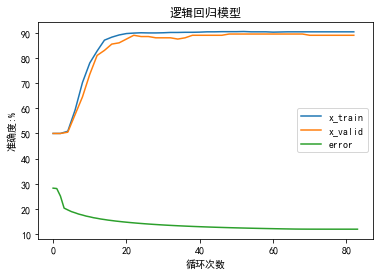

In [118]:
lg.show()

这是训练曲线图

### 5.4 对比

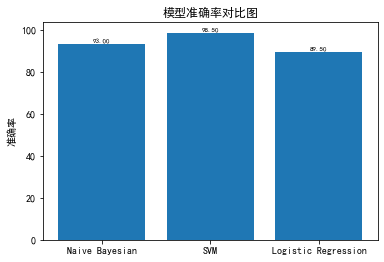

In [119]:
models=['Naive Bayesian','SVM','Logistic Regression']
acc_scores=[nb_acc,svm_acc,lg_acc]
plt.bar(models,acc_scores)
plt.ylabel("准确率")
plt.title("模型准确率对比图")
for a,b in zip(models,acc_scores):   #柱子上的数字显示
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=7)
plt.show()

对比发现，三个模型在test集上都能取得较高精度，SVM > Naive Bayesain > Logistic Regression

## 6 时间对比

### 6.1 Naïve Bayesian

#### 6.1.1 训练时间

In [120]:
start_time = time.time()
nb.fit(NB_x_train,NB_y_train)
nb_train_time = time.time()-start_time
print("Naïve Bayesian 训练时间 %f" %nb_train_time)

Naïve Bayesian 训练时间 0.071998


#### 6.1.2 预测时间

In [121]:
start_time = time.time()
nb.predict(NB_x_test)
nb_test_time = time.time()-start_time
print("Naïve Bayesian 预测时间 %f" %nb_test_time)

Naïve Bayesian 预测时间 0.017000


### 6.2 SVM

#### 6.2.1 训练时间

In [122]:
start_time = time.time()
svm.fit(x_train,y_train)
svm_train_time = time.time()-start_time
print("SVM 训练时间 %f" %svm_train_time)

SVM 训练时间 0.096998


#### 6.2.2 预测时间

In [123]:
start_time = time.time()
svm.predict(x_test)
svm_test_time = time.time()-start_time
print("SVM 预测时间 %f" %svm_test_time)

SVM 预测时间 0.002002


### 6.3 Logistic regression


#### 6.3.1 训练时间

In [124]:
start_time = time.time()
lg.fit(x_train,y_train,x_valid,y_valid)
lg_train_time = time.time()-start_time
print("Logistic regression 训练时间 %f" %lg_train_time)


训练轮数: 84
Logistic regression 训练时间 0.207999


#### 6.3.2 预测时间

In [ ]:
start_time = time.time()
lg.predict(x_test)
lg_test_time = time.time()-start_time
print("Logistic regression 预测时间 %f" %lg_test_time)

### 6.4 对比

#### 6.4.1 训练时间

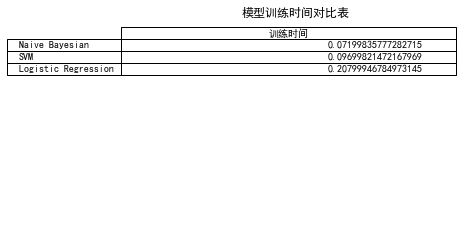

In [126]:
table_vals=[[nb_train_time],[svm_train_time],[lg_train_time]]
plt.table(cellText=table_vals,rowLabels=models,colLabels=['训练时间'],loc='best')
plt.axis('off')
plt.title('模型训练时间对比表')
plt.show()

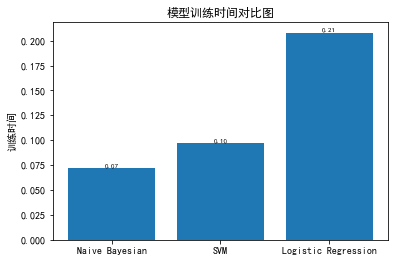

In [127]:
models=['Naive Bayesian','SVM','Logistic Regression']
acc_scores=[nb_train_time,svm_train_time,lg_train_time]
plt.bar(models,acc_scores)
plt.ylabel("训练时间")
plt.title("模型训练时间对比图")
for a,b in zip(models,acc_scores):   #柱子上的数字显示
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=7)
plt.show()

训练时间：Logistic Regression > SVM > Naive Bayesian

#### 6.4.2 预测时间 

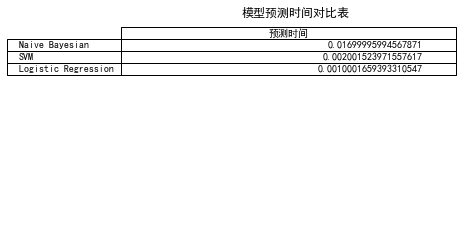

In [128]:
table_vals=[[nb_test_time],[svm_test_time],[lg_test_time]]
plt.table(cellText=table_vals,rowLabels=models,colLabels=['预测时间'],loc='best')
plt.axis('off')
plt.title('模型预测时间对比表')
plt.show()

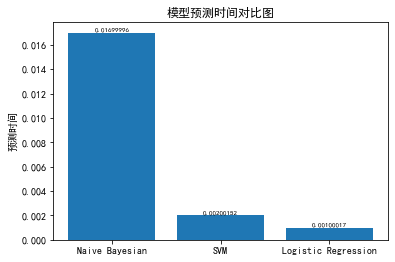

In [129]:
models=['Naive Bayesian','SVM','Logistic Regression']
acc_scores=[nb_test_time,svm_test_time,lg_test_time]
plt.bar(models,acc_scores)
plt.ylabel("预测时间")
plt.title("模型预测时间对比图")
for a,b in zip(models,acc_scores):   #柱子上的数字显示
    plt.text(a,b,'%.8f'%b,ha='center',va='bottom',fontsize=7)
plt.show()

预测时间：Naive Bayesian > SVM > Logistic Regression

## 7 总结

经过对比后发现：





### 7.1 Naive Bayesian

Naive Bayesian所需要的训练时间最短，但是预测时间最长，准确率居中。

Naive Bayesian只需要一次训练，所以训练时间短，但每次预测都需要计算大量的概率，所以预测时间长。

优点在于对于算法稳定，对不同数据的分类性能差异不大。
    
缺点在于数据的独立性要求高，本次数据因为关联性不大，所以准确度较高。


### 7.2 Logical Regression
Logical Regression的训练时间最长但是预测时间最短，而准确率不高。

Logical Regression采用梯度下降法优化参数，迭代需要较长时间，但预测时只需简单计算，预测时间会比较短。

优点在于简单高效，一旦参数确定，预测非常方便.

缺点在于精度不高。


### 7.3 svm

svm的训练时间和预测时间都是中等，而准确率最高;

svm直接调用sklearn中的库函数，精度最高，而训练时间和预测时间都属于中等水平。

优点在于精度高，时间均衡。

缺点在于对参数和核函数选择非常敏感。




